In [1]:
import pulp as pl
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from sympy import symbols, solve

In [11]:
# 問題の定義
prob = pl.LpProblem("day1_example", pl.LpMaximize)

# 変数の定義
x_1 = pl.LpVariable("x_1", lowBound=0)
x_2 = pl.LpVariable("x_2", lowBound=0)

# 目的関数の定義
prob += 4*x_1 + 5*x_2

# 制約条件の定義
prob += x_1 + 2*x_2 <= 8
prob += 3*x_1 + x_2 <= 9

# 問題を解く
prob.solve()

# 結果の表示
print(f"{pl.LpStatus[prob.status]} solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Objective = ", pl.value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /usr/local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/154ff7239b2441b299fab38c56c46f81-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/154ff7239b2441b299fab38c56c46f81-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 8.9999998 (2)
0  Obj -0 Dual inf 8.9999998 (2)
2  Obj 23
Optimal - objective value 23
Optimal objective 23 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Optimal solution:
x_1 = 2.0
x_2 = 3.0
Objective =  23.0


# 演習問題の検算

In [2]:
# 問題の定義
prob = pl.LpProblem("exercise_1_2", pl.LpMaximize)

# 変数の定義
x_1 = pl.LpVariable("x_1", lowBound=0, upBound=3)
x_2 = pl.LpVariable("x_2", lowBound=0)

# 目的関数の定義
prob += x_1 + 2*x_2

# 制約条件の定義
prob += -2*x_1 + x_2 <= 2
prob += -x_1 + 2*x_2 <= 7

# 問題を解く
prob.solve()

# 結果の表示
print(f"{pl.LpStatus[prob.status]} solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Objective = ", pl.value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /usr/local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/cd42ffb300f04ecfb8a0a99f14de3ffd-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/cd42ffb300f04ecfb8a0a99f14de3ffd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 19 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 13
After Postsolve, objective 13, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 13 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Optimal solu

In [20]:
prob.constraints['_C1']

-2*x_1 + 1*x_2 + -2 <= 0

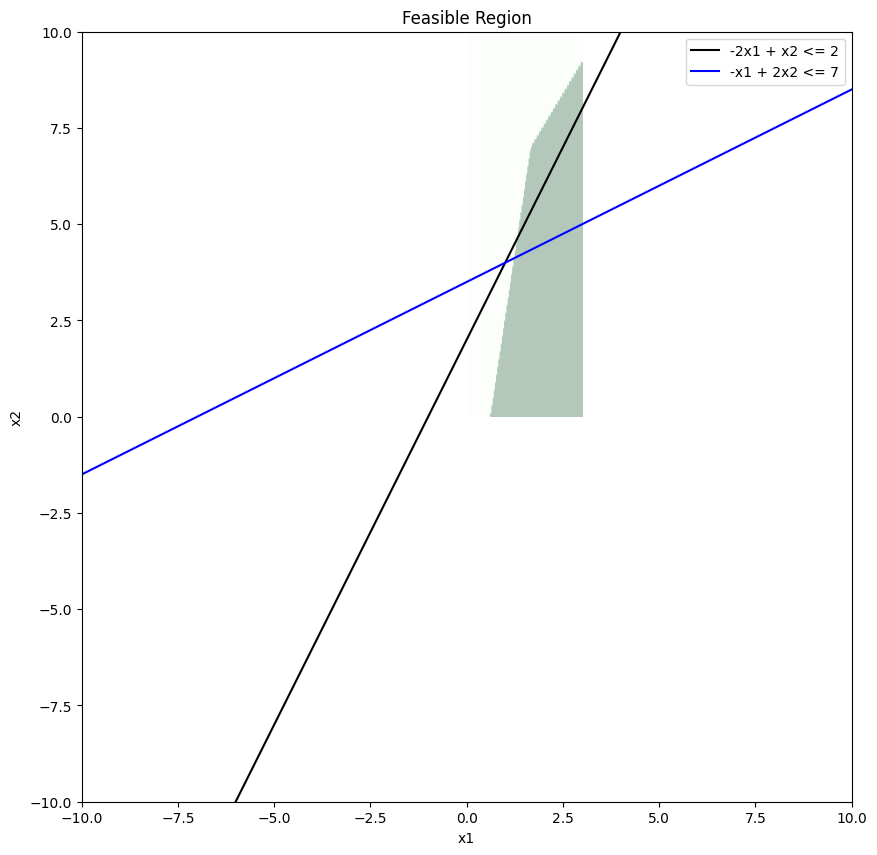

In [6]:
# 実行可能解の領域を可視化
x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(-10, 10, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

con1 = -2*x1_grid + x2_grid <= 2
con2 = -x1_grid + 2*x2_grid <= 7

feasible_region = con1 & con2

plt.figure(figsize=(10, 10))
plt.imshow(feasible_region, origin='lower', extent=(0, 3, 0, 10), alpha=0.3, cmap='Greens')
plt.plot(x1_range, (2 + 2*x1_range), 'k-', label='-2x1 + x2 <= 2')
plt.plot(x1_range, (7 + x1_range)/2, 'b-', label='-x1 + 2x2 <= 7')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Feasible Region')
plt.show()

In [9]:
con1.shape

(100, 100)

In [7]:
# 問題の定義
prob = pl.LpProblem("day1__4", pl.LpMinimize)

# 変数の定義
x_1 = pl.LpVariable("x_1", lowBound=10)
x_2 = pl.LpVariable("x_2", lowBound=5)
x_3 = pl.LpVariable("x_3", lowBound=15)

# 目的関数の定義
prob += 500 * x_1 + 550 * x_2 + 450 * x_3

# 制約条件の定義
prob += -x_1 - x_2 - x_3 <= -40
prob += x_2 + x_3 <= 25

# 問題を解く
prob.solve()

# 結果の表示
print(f"{pl.LpStatus[prob.status]} solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Objective = ", pl.value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /usr/local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/0a4ab9d271cc48f2b07b515deb01646d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/0a4ab9d271cc48f2b07b515deb01646d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 16 RHS
At line 19 BOUNDS
At line 23 ENDATA
Problem MODEL has 2 rows, 3 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-1) rows, 2 (-1) columns and 2 (-3) elements
0  Obj 16950 Primal inf 5.0999992 (1)
1  Obj 19250
Optimal - objective value 19250
After Postsolve, objective 19250, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 19250 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Optima

In [12]:
# 問題の定義
prob = pl.LpProblem("day1__4", pl.LpMaximize)

# 変数の定義
x_1 = pl.LpVariable("x_1_prime", lowBound=0)
x_2 = pl.LpVariable("x_2_prime", lowBound=0)
x_3 = pl.LpVariable("x_3_prime", lowBound=0)

# 目的関数の定義
prob += -500 * x_1 - 550 * x_2 - 450 * x_3 - 500 * 10 - 550 * 5 - 550 * 15

# 制約条件の定義
prob += x_1 + x_2 + x_3 >= 10
prob += x_2 + x_3 <= 5

# 問題を解く
prob.solve()

# 結果の表示
print(f"{pl.LpStatus[prob.status]} solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Objective = ", pl.value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /usr/local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/d7a100f63dd54aae9dbe1c1b65036d41-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/d7a100f63dd54aae9dbe1c1b65036d41-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 16 RHS
At line 19 BOUNDS
At line 20 ENDATA
Problem MODEL has 2 rows, 3 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-1) rows, 2 (-1) columns and 2 (-3) elements
0  Obj -2450 Primal inf 5.099999 (1)
1  Obj -4750
Optimal - objective value -4750
After Postsolve, objective -4750, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -4750 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Op

In [2]:
# 基底解の列挙
def find_basic_solutions():
    solutions = []
    variables = [x1, x2, s1, s2, s3]
    # すべての組み合わせで，3つを基底変数とし，残りを0に設定
    for basic_vars in combinations(variables, 3):
        non_basic_vars = set(variables) - set(basic_vars)
        # 非基底変数を0に設定
        equations = [eq1, eq2, eq3] + [var for var in non_basic_vars]
        try:
            solution = solve(equations, variables, dict=True)
            # 解が正であること，および一意であることを確認
            if solution and all(sol[variable] >= 0 for variable in variables for sol in solution):
                solutions.append(solution[0])
        except Exception as e:
            pass
    return solutions

# 定義する変数
x1, x2, s1, s2, s3 = symbols('x1 x2 s1 s2 s3')

# スラック変数を加えた等式
eq1 = -2*x1 + x2 + s1 - 2
eq2 = -x1 + 2*x2 + s2 - 7
eq3 = x1 + s3 - 3

# 基底解を見つける
basic_solutions_corrected = find_basic_solutions()
basic_solutions_corrected

[{s1: 3, s2: 0, s3: 0, x1: 3, x2: 5},
 {s1: 0, s2: 0, s3: 2, x1: 1, x2: 4},
 {s1: 8, s2: 10, s3: 0, x1: 3, x2: 0},
 {s1: 0, s2: 3, s3: 3, x1: 0, x2: 2},
 {s1: 2, s2: 7, s3: 3, x1: 0, x2: 0}]

In [16]:
!pwd

/code/notebooks
